# IBTrACS and emdat (university of Lovaine) exploratory data analysis and merge 
(Work in Progress)

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
import numpy as np
import pandas as pd
#import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
import operator
import warnings
warnings.filterwarnings("ignore")
from pandas.plotting import scatter_matrix
import folium
import re

% cd '/content/drive/My Drive/Omdena Clyclone Challenge'

/content/drive/My Drive/Omdena Clyclone Challenge


## 1. IBTrACS exploratory data analysis

In [0]:
# df = pd.read_excel('./Storm db from NOAA (1842-2019)_private/IBTrACS-ALL-list-v04r00-lines-dbf.xlsx')
# df.to_csv('./Storm db from NOAA (1842-2019)_private/IBTrACS-ALL-list-v04r00-lines-dbf.csv', index = False)

In [0]:
df_IBTrACS = pd.read_csv('./Storm db from NOAA (1842-2019)_private/IBTrACS-ALL-list-v04r00-lines-dbf.csv')

### Inspect dataset

In [113]:
df_IBTrACS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669870 entries, 0 to 669869
Columns: 165 entries, SID to min
dtypes: float64(136), int64(11), object(18)
memory usage: 843.3+ MB


In [114]:
print(list(df_IBTrACS.columns))

['SID', 'SEASON', 'NUMBER', 'BASIN', 'SUBBASIN', 'NAME', 'ISO_TIME', 'NATURE', 'LAT', 'LON', 'WMO_WIND', 'WMO_PRES', 'WMO_AGENCY', 'TRACK_TYPE', 'DIST2LAND', 'LANDFALL', 'IFLAG', 'USA_AGENCY', 'USA_ATCFID', 'USA_LAT', 'USA_LON', 'USA_RECORD', 'USA_STATUS', 'USA_WIND', 'USA_PRES', 'USA_SSHS', 'USA_R34_NE', 'USA_R34_SE', 'USA_R34_SW', 'USA_R34_NW', 'USA_R50_NE', 'USA_R50_SE', 'USA_R50_SW', 'USA_R50_NW', 'USA_R64_NE', 'USA_R64_SE', 'USA_R64_SW', 'USA_R64_NW', 'USA_POCI', 'USA_ROCI', 'USA_RMW', 'USA_EYE', 'TOK_LAT', 'TOK_LON', 'TOK_GRADE', 'TOK_WIND', 'TOK_PRES', 'TOK_R50_DR', 'TOK_R50_L', 'TOK_R50_S', 'TOK_R30_DR', 'TOK_R30_L', 'TOK_R30_S', 'TOK_LAND', 'CMA_LAT', 'CMA_LON', 'CMA_CAT', 'CMA_WIND', 'CMA_PRES', 'HKO_LAT', 'HKO_LON', 'HKO_CAT', 'HKO_WIND', 'HKO_PRES', 'NEW_LAT', 'NEW_LON', 'NEW_GRADE', 'NEW_WIND', 'NEW_PRES', 'NEW_CI', 'NEW_DP', 'NEW_POCI', 'REU_LAT', 'REU_LON', 'REU_TYPE', 'REU_WIND', 'REU_PRES', 'REU_TNUM', 'REU_CI', 'REU_RMW', 'REU_R34_NE', 'REU_R34_SE', 'REU_R34_SW', 'REU

In [115]:
df_IBTrACS.describe()

SEASON         NUMBER  ...           hour            min
count  669870.000000  669870.000000  ...  669870.000000  669870.000000
mean     1959.754024      49.286418  ...      10.585542       0.047390
std        41.193964      34.210458  ...       6.919457       1.262471
min      1842.000000       1.000000  ...       0.000000       0.000000
25%      1933.000000      20.000000  ...       5.000000       0.000000
50%      1969.000000      44.000000  ...      11.000000       0.000000
75%      1993.000000      74.000000  ...      18.000000       0.000000
max      2019.000000     163.000000  ...      23.000000      59.000000

[8 rows x 147 columns]

In [116]:
def get_perc_values(df):
  return sorted({k:round(v/df.shape[0],3) for k,v in dict(df.notnull().sum()).items()}.items(), key=operator.itemgetter(1), reverse=True)

sorted_perc_values = get_perc_values(df_IBTrACS)
sorted_perc_values

[('SID', 1.0),
 ('SEASON', 1.0),
 ('NUMBER', 1.0),
 ('NAME', 1.0),
 ('ISO_TIME', 1.0),
 ('NATURE', 1.0),
 ('LAT', 1.0),
 ('LON', 1.0),
 ('TRACK_TYPE', 1.0),
 ('DIST2LAND', 1.0),
 ('LANDFALL', 1.0),
 ('IFLAG', 1.0),
 ('NEW_CI', 1.0),
 ('REU_TNUM', 1.0),
 ('REU_CI', 1.0),
 ('BOM_TNUM', 1.0),
 ('BOM_CI', 1.0),
 ('STORM_SPD', 1.0),
 ('STORM_DR', 1.0),
 ('year', 1.0),
 ('month', 1.0),
 ('day', 1.0),
 ('hour', 1.0),
 ('min', 1.0),
 ('USA_SSHS', 0.992),
 ('SUBBASIN', 0.869),
 ('BASIN', 0.827),
 ('USA_ATCFID', 0.629),
 ('USA_LAT', 0.625),
 ('USA_LON', 0.625),
 ('USA_WIND', 0.532),
 ('TD6_STAGE', 0.448),
 ('TD6_LAT', 0.439),
 ('TD6_LON', 0.439),
 ('USA_STATUS', 0.322),
 ('USA_AGENCY', 0.307),
 ('WMO_AGENCY', 0.295),
 ('DS8_STAGE', 0.277),
 ('DS8_LAT', 0.273),
 ('DS8_LON', 0.273),
 ('DS8_WIND', 0.236),
 ('WMO_PRES', 0.212),
 ('WMO_WIND', 0.209),
 ('USA_PRES', 0.198),
 ('CMA_CAT', 0.195),
 ('CMA_LAT', 0.193),
 ('CMA_LON', 0.193),
 ('CMA_PRES', 0.193),
 ('TOK_LAT', 0.18),
 ('TOK_LON', 0.18),
 ('TO

### Filter dataset

In [0]:
df_IBTrACS_f = df_IBTrACS[df_IBTrACS['SEASON']>= 1980]
df_IBTrACS_f.reset_index(drop=True,inplace=True)

In [118]:
"""test = df_filter[(df_filter['SEASON']==1994) & (df_filter['month']==5)]
test['NUMBER'].unique()"""

"test = df_filter[(df_filter['SEASON']==1994) & (df_filter['month']==5)]\ntest['NUMBER'].unique()"

In [119]:
df_IBTrACS.set_index(['SEASON','NAME','NUMBER'])

SID BASIN SUBBASIN  ... day hour  min
SEASON NAME      NUMBER                                ...              
1842   NOT_NAMED 1       1842298N11080    NI       BB  ...  25    3    0
                 1       1842298N11080    NI       BB  ...  25    6    0
                 1       1842298N11080    NI       BB  ...  25    9    0
                 1       1842298N11080    NI       BB  ...  25   12    0
                 1       1842298N11080    NI       BB  ...  25   15    0
...                                ...   ...      ...  ...  ..  ...  ...
2019   ANDREA    24      2019141N29291   NaN      NaN  ...  20   21    0
                 24      2019141N29291   NaN      NaN  ...  21    0    0
                 24      2019141N29291   NaN      NaN  ...  21    3    0
                 24      2019141N29291   NaN      NaN  ...  21    6    0
                 24      2019141N29291   NaN      NaN  ...  21    9    0

[669870 rows x 162 columns]

### Analysis of columns up to "LANDFALL" 
(excluding different agencies info)

In [120]:
df_IBTrACS_reduced = df_IBTrACS_f.loc[:,:"LANDFALL"]
df_IBTrACS_reduced.head()

SID  SEASON  NUMBER  ... TRACK_TYPE DIST2LAND LANDFALL
0  1979238S08085    1980      76  ...       main      1653     1646
1  1979238S08085    1980      76  ...       main      1657     1657
2  1979238S08085    1980      76  ...       main      1657     1653
3  1979238S08085    1980      76  ...       main      1653     1650
4  1979238S08085    1980      76  ...       main      1661     1658

[5 rows x 16 columns]

In [121]:
get_perc_values(df_IBTrACS_reduced)

[('SID', 1.0),
 ('SEASON', 1.0),
 ('NUMBER', 1.0),
 ('NAME', 1.0),
 ('ISO_TIME', 1.0),
 ('NATURE', 1.0),
 ('LAT', 1.0),
 ('LON', 1.0),
 ('TRACK_TYPE', 1.0),
 ('DIST2LAND', 1.0),
 ('LANDFALL', 1.0),
 ('SUBBASIN', 0.898),
 ('BASIN', 0.873),
 ('WMO_AGENCY', 0.423),
 ('WMO_PRES', 0.389),
 ('WMO_WIND', 0.363)]

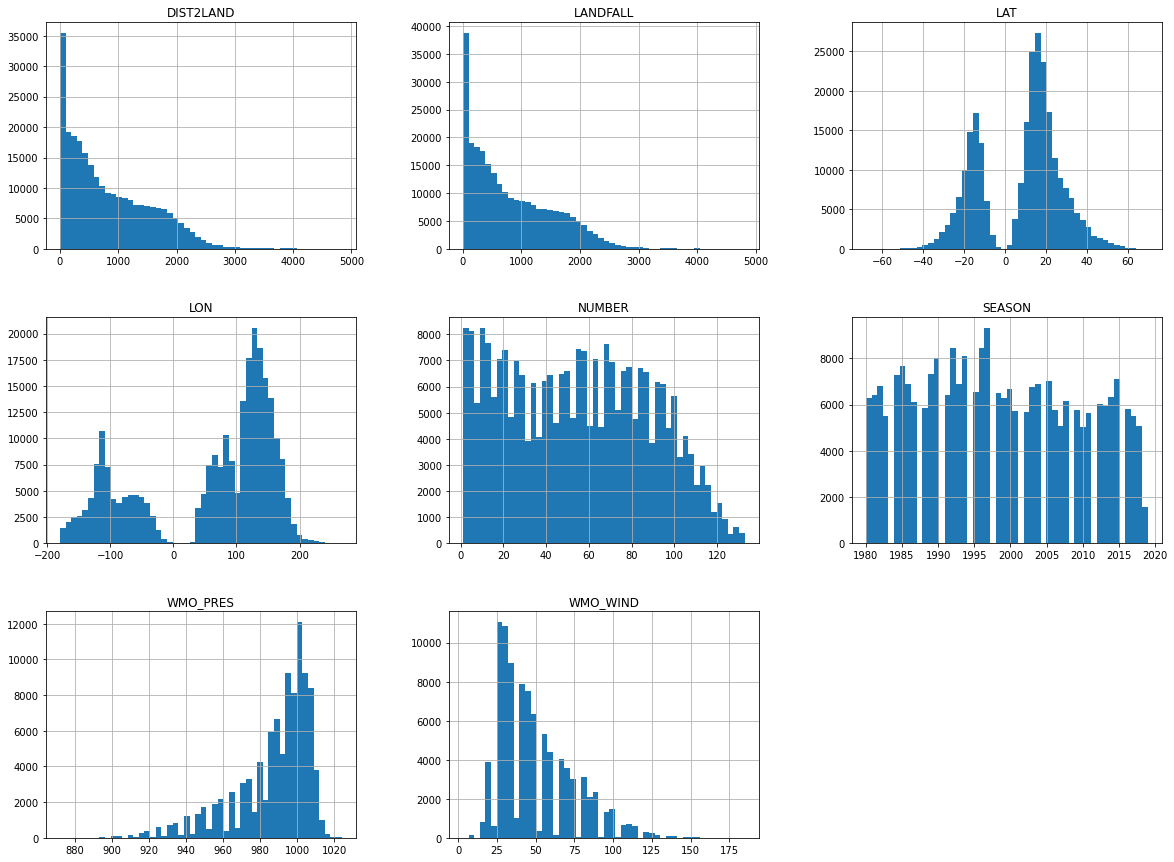

In [122]:
df_IBTrACS_reduced.hist(bins = 50, figsize = (20,15))
plt.show()

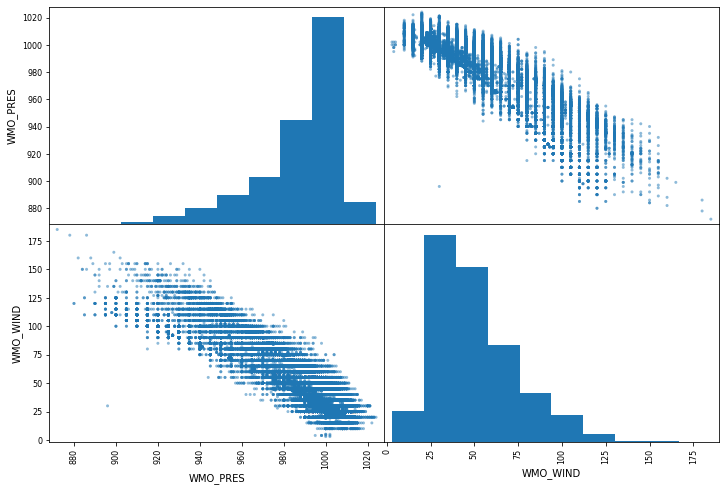

In [123]:
scatter_matrix(df_IBTrACS_reduced[['WMO_PRES', 'WMO_WIND']], figsize = (12,8));

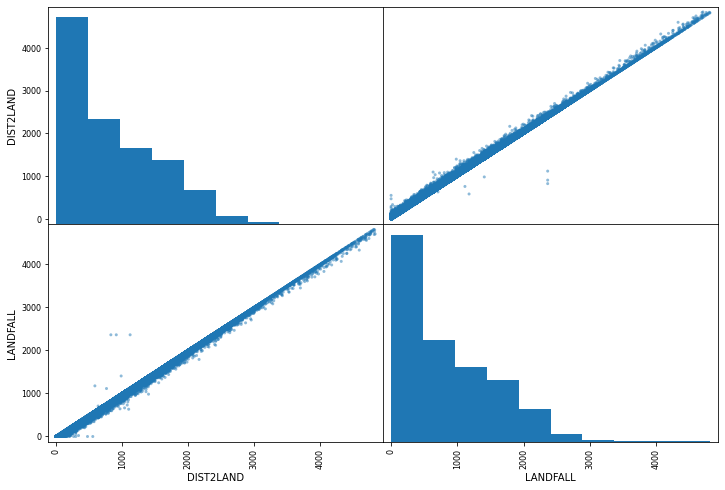

In [124]:
scatter_matrix(df_IBTrACS_reduced[['DIST2LAND', 'LANDFALL']], figsize = (12,8));

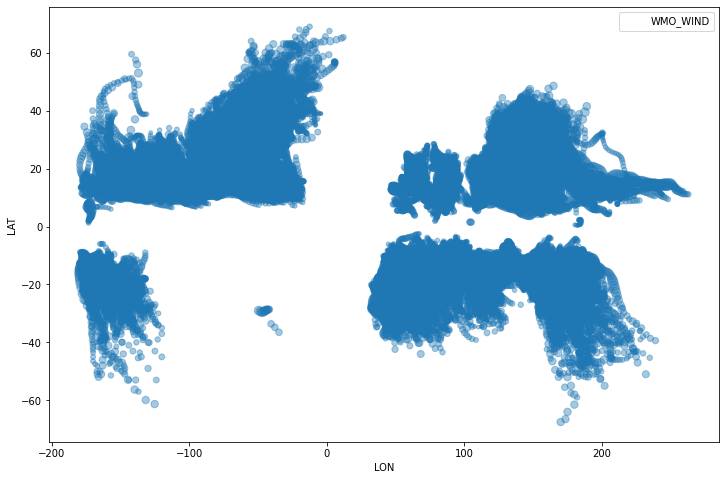

In [125]:
df_IBTrACS_reduced.plot(kind = "scatter", x="LON", y="LAT", figsize = (12,8), alpha= 0.4, 
                s = df_IBTrACS_reduced['WMO_WIND'], label = 'WMO_WIND');

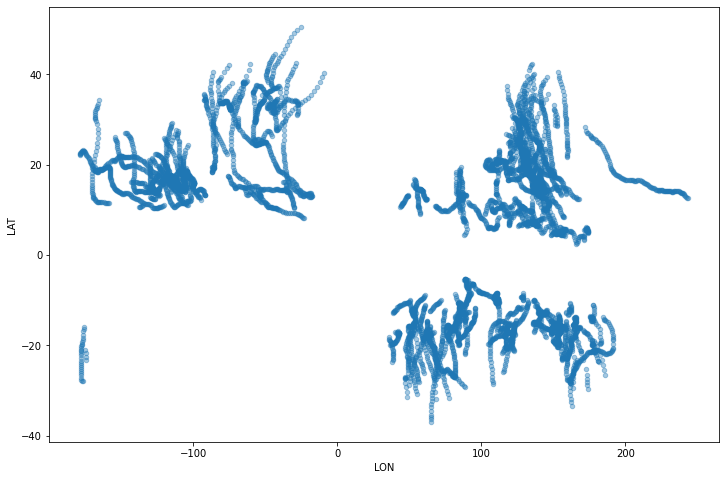

In [126]:
df_IBTrACS_reduced[df_IBTrACS_reduced['SEASON']>2017].plot(kind = "scatter", x="LON", y="LAT", figsize = (12,8), alpha= 0.4);

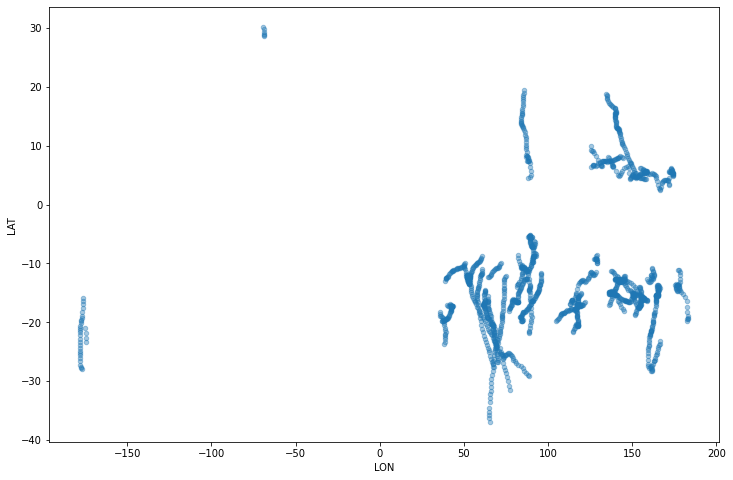

In [127]:
df_IBTrACS_reduced[df_IBTrACS_reduced['SEASON']>2018].plot(kind = "scatter", x="LON", y="LAT", figsize = (12,8), alpha= 0.4);

# Here we can see that the cyclone data we have is the movement of the "eye" of the cyclone during a period of time, creating those line figures

In [128]:
from folium.plugins import HeatMap

def generateBaseMap(default_location=[40.4167754, -3.7037902], default_zoom_start=2):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

base_map = generateBaseMap()

HeatMap(data=df_IBTrACS_reduced[['LAT', 'LON', 'NUMBER']].groupby(['LAT', 'LON']).count().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)


In [129]:
# In this heatmap we can see the areas most affected  by cyclones 

base_map

### Merge with emdat dataset




In [134]:
# look for random Cyclone
df_IBTrACS_reduced[df_IBTrACS_reduced['NAME'] == 'YAGI'].head()

SID  SEASON  NUMBER  ... TRACK_TYPE DIST2LAND LANDFALL
147123  2000295N20146    2000      98  ...       main      1772     1723
147124  2000295N20146    2000      98  ...       main      1723     1681
147125  2000295N20146    2000      98  ...       main      1667     1611
147126  2000295N20146    2000      98  ...       main      1607     1550
147127  2000295N20146    2000      98  ...       main      1547     1508

[5 rows x 16 columns]

In [131]:
# group by name (because embdat just has one entry per cyclone)
# for now it is done with the mean, but this should be done carefully depending on each feature
df_IBTrACS_by_name = df_IBTrACS.groupby(['NAME']).mean().reset_index()
df_IBTrACS_by_name.head()

NAME       SEASON      NUMBER  ...        day       hour  min
0        3-C  1992.000000  125.000000  ...  22.000000  10.500000  0.0
1    ABAIMBA  2003.586957   71.739130  ...   9.847826  10.760870  0.0
2       ABBY  1977.282780   62.962085  ...  11.780411  10.467615  0.0
3        ABE  1991.185185   69.839506  ...  17.049383  10.537037  0.0
4  ABEL:BETH  1996.000000   94.000000  ...  14.622951  10.549180  0.0

[5 rows x 148 columns]

## 2. emdat dataset (university of Lovaine) exploratory data analysis 

In [0]:
df_embdat = pd.read_csv('emdat_public.csv')

### Inspect dataset

In [137]:
df_embdat.head()

Year     Seq  ISO  ... Insured losses ('000$) Total damage ('000$)       CPI
0  1900  9002.0  CPV  ...                    NaN                  NaN  3.261389
1  1900     8.0  JPN  ...                    NaN                  NaN  3.261389
2  1900     7.0  JAM  ...                    NaN                  NaN  3.261389
3  1900  9001.0  IND  ...                    NaN                  NaN  3.261389
4  1900     6.0  JAM  ...                    NaN                  NaN  3.261389

[5 rows x 43 columns]

In [138]:
df_embdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24273 entries, 0 to 24272
Data columns (total 43 columns):
Year                           24272 non-null object
Seq                            24270 non-null float64
ISO                            24269 non-null object
Group                          24270 non-null object
Subgroup                       24270 non-null object
Type                           24270 non-null object
Subtype                        21439 non-null object
Subsubtype                     1013 non-null object
Event name                     7640 non-null object
Entry criteria                 23933 non-null object
Country name                   24269 non-null object
Region                         24269 non-null object
Continent                      24269 non-null object
EU member                      24269 non-null object
Location                       21987 non-null object
Origin                         3597 non-null object
Associated disater             3071 non-null 

In [139]:
df_embdat.describe()

Seq  ...           CPI
count  24270.000000  ...  24226.000000
mean     578.411743  ...     64.337058
std     1577.977491  ...     25.202793
min        1.000000  ...      3.261389
25%      105.000000  ...     51.106795
50%      282.500000  ...     69.259340
75%      484.000000  ...     84.215229
max     9881.000000  ...    100.000000

[8 rows x 18 columns]

In [140]:
def get_perc_values(df):
  return sorted({k:round(v/df.shape[0],3) for k,v in dict(df.notnull().sum()).items()}.items(), key=operator.itemgetter(1), reverse=True)

sorted_perc_values = get_perc_values(df_embdat)
sorted_perc_values

[('Year', 1.0),
 ('Seq', 1.0),
 ('ISO', 1.0),
 ('Group', 1.0),
 ('Subgroup', 1.0),
 ('Type', 1.0),
 ('Country name', 1.0),
 ('Region', 1.0),
 ('Continent', 1.0),
 ('EU member', 1.0),
 ('Start year', 1.0),
 ('End year', 1.0),
 ('CPI', 0.998),
 ('Entry criteria', 0.986),
 ('Start month', 0.979),
 ('End month', 0.966),
 ('Location', 0.906),
 ('Subtype', 0.883),
 ('End day', 0.84),
 ('Start day', 0.838),
 ('Total deaths', 0.793),
 ('Total affected', 0.651),
 ('Magnitude (scale)', 0.648),
 ('Num affected', 0.392),
 ('Num injured', 0.318),
 ('Event name', 0.315),
 ('Declaration', 0.294),
 ('Appeal', 0.268),
 ("Total damage ('000$)", 0.216),
 ('Magnitude (value)', 0.194),
 ('Origin', 0.148),
 ('Associated disater', 0.127),
 ('Latitude', 0.106),
 ('Longitude', 0.106),
 ('Num homeless', 0.104),
 ('OFDA response', 0.072),
 ('River basin', 0.051),
 ("Insured losses ('000$)", 0.044),
 ('Subsubtype', 0.042),
 ('Local time', 0.039),
 ("Aid contribution ('000$)", 0.028),
 ('Associated disater 2', 0.0

In [141]:
df_embdat.Type.value_counts()

Transport accident        5907
Flood                     5172
Storm                     4285
Industrial accident       1509
Earthquake                1493
Epidemic                  1486
Miscellaneous accident    1480
Drought                    746
Landslide                  745
Extreme temperature        596
Wildfire                   445
Volcanic activity          255
Insect infestation          86
Mass movement (dry)         48
Complex Disasters           14
Fog                          1
Animal accident              1
Impact                       1
Name: Type, dtype: int64

In [142]:
df_embdat.Subtype.value_counts()

Road                                2710
Riverine flood                      2638
Tropical cyclone                    2295
Water                               1493
Ground movement                     1436
Air                                 1072
Convective storm                    1047
Explosion                            968
Fire                                 941
Bacterial disease                    764
Drought                              745
Flash flood                          701
Rail                                 631
Landslide                            550
Viral disease                        532
Collapse                             449
Other                                360
Cold wave                            307
Forest fire                          298
Ash fall                             243
Heat wave                            212
Land fire (Brush, Bush, Pasture)     122
Extra-tropical storm                 121
Avalanche                            116
Chemical spill  

In [143]:
df_embdat.Subsubtype.value_counts()

Tornado                    275
Winter storm/Blizzard      213
Severe storm               201
Lightning/Thunderstorms    179
Hail                       111
Sand/Dust storm             16
Snow/Ice                     6
Mudslide                     5
Derecho                      3
Sudden subsidence            2
Rain                         1
Storm/Surge                  1
Name: Subsubtype, dtype: int64

### Filter dataset

In [144]:
df_embdat_f = df_embdat[df_embdat['Subtype'] == "Tropical cyclone"]
df_embdat_f.reset_index(drop=True,inplace=True)
df_embdat_f.head()

Year   Seq  ISO  ... Insured losses ('000$) Total damage ('000$)       CPI
0  1902   5.0  MMR  ...                    NaN                  NaN  3.391845
1  1903   8.0  JAM  ...                    NaN                  NaN  3.522300
2  1904   3.0  BGD  ...                    NaN                  NaN  3.522300
3  1906  15.0  HKG  ...                    NaN              20000.0  3.522300
4  1909  10.0  BGD  ...                    NaN                  NaN  3.522300

[5 rows x 43 columns]

In [145]:
get_perc_values(df_embdat_f)

[('Year', 1.0),
 ('Seq', 1.0),
 ('ISO', 1.0),
 ('Group', 1.0),
 ('Subgroup', 1.0),
 ('Type', 1.0),
 ('Subtype', 1.0),
 ('Entry criteria', 1.0),
 ('Country name', 1.0),
 ('Region', 1.0),
 ('Continent', 1.0),
 ('EU member', 1.0),
 ('Magnitude (scale)', 1.0),
 ('Start year', 1.0),
 ('End year', 1.0),
 ('CPI', 0.999),
 ('Start month', 0.992),
 ('End month', 0.992),
 ('Start day', 0.922),
 ('End day', 0.922),
 ('Location', 0.833),
 ('Event name', 0.821),
 ('Total deaths', 0.773),
 ('Total affected', 0.7),
 ('Num affected', 0.57),
 ("Total damage ('000$)", 0.546),
 ('Magnitude (value)', 0.321),
 ('Num injured', 0.314),
 ('Associated disater', 0.286),
 ('Num homeless', 0.199),
 ('Declaration', 0.174),
 ('Appeal', 0.134),
 ('OFDA response', 0.127),
 ('Associated disater 2', 0.11),
 ("Insured losses ('000$)", 0.085),
 ("Aid contribution ('000$)", 0.051),
 ('Latitude', 0.044),
 ('Longitude', 0.044),
 ('River basin', 0.01),
 ('Origin', 0.004),
 ("Reconstruction cost ('000$)", 0.003),
 ('Local tim

In [146]:
# list of attributes for which less than 18% of the entries have info
attributes_no_info = [e[0] for e in get_perc_values(df_embdat_f) if e[1] < 0.18]
# remove them from dataset
df_embdat_f = df_embdat_f.drop(columns = attributes_no_info)

attributes_no_info

['Declaration',
 'Appeal',
 'OFDA response',
 'Associated disater 2',
 "Insured losses ('000$)",
 "Aid contribution ('000$)",
 'Latitude',
 'Longitude',
 'River basin',
 'Origin',
 "Reconstruction cost ('000$)",
 'Local time',
 'Subsubtype']

In [0]:
# drop columns with not useful information
df_embdat_f = df_embdat_f.drop(columns = ["Subgroup", "Type", "Subtype", "Group"])

df_embdat_f.head()

### Merge with ibtracs dataset

In [149]:
# look for random Cyclone
df_embdat_f[(df_embdat_f['Event name'] == 'Tropical Storm Yagi') & (df_embdat_f['Country name'] == 'Philippines (the)')]

Year    Seq  ISO  ... Total affected Total damage ('000$)        CPI
2274  2018  347.0  PHL  ...      1709511.0              19000.0  98.219991

[1 rows x 26 columns]

In [0]:
# clean the column name, to be able to merge both datasets on this column

def clean_name(name):
  if name:
    name = re.sub("Tropical cylone|Cyclone|'|\"", "", name)
    return name.upper()
  else:
    pass


# for now drop rows with NaN in name, but later this could be rethought
df_embdat_f_nonulls = df_embdat_f.dropna(subset=['Event name'])
  
df_embdat_f_nonulls['Event name'] = df_embdat_f_nonulls['Event name'].apply(clean_name)

In [153]:
# group by name (there are some duplicate names when the cyclone has affected different countries, one for each)
# for now entries are grouped for lean purposes, but this should be rethought
df_embdat_by_name = df_embdat_f_nonulls.groupby(['Event name']).mean().reset_index()
df_embdat_by_name.head()

Event name    Seq  ...  Total damage ('000$)         CPI
0         3A  438.0  ...                2000.0   91.120794
1       AILA  204.0  ...              270000.0   83.915807
2        AVA    8.0  ...                   NaN   98.219991
3     BEISJA   16.0  ...               85000.0   92.598981
4      BELNA  601.0  ...               25000.0  100.000000

[5 rows x 16 columns]

## 2. Datasets merge

In [162]:
df_ibtracs_emdat = pd.merge(df_IBTrACS_by_name, df_embdat_by_name, how='inner', on=None, left_on='NAME', right_on='Event name')
df_ibtracs_emdat.head()

NAME       SEASON  ...  Total damage ('000$)        CPI
0    ABBY  1977.282780  ...               80000.0  22.003187
1     ABE  1991.185185  ...              350305.0  52.906079
2     ADA  1968.581281  ...               72475.0  15.186335
3    ADEL  1993.000000  ...                1500.0  56.504646
4  ADRIAN  1999.022989  ...                   NaN  76.388027

[5 rows x 164 columns]

# Next steps
- **Merge datasets**:
    - ibtracs: keep looking into this dataset and specially agencies info about the intensity of the cyclones (they are in different scales so is not as easy as getting the mean of the scores or getting the highest one)
    - emdat: keep looking into the dataset, specially regarding the number of affected people
    - Merge both datasets taking into account how to group ibtracs entries in one row per cyclone and how to group emdat entries with same name but different country (or not group and try to find each in ibtracs). Also check best ways to clean both datasets so that when merging them we get more than 434 rows
- **Look into TCE_DATA** to merge it as well
